In [ ]:
# General Imports
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping
# Tensorflow Keras library specific imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import preprocessing
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

#from tensorflow.keras.applications.MobileNet import MobileNet, preprocess_input, decode_predictions
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, UpSampling2D, Dropout,BatchNormalization,GlobalAveragePooling2D
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Load CIFAR-100 data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


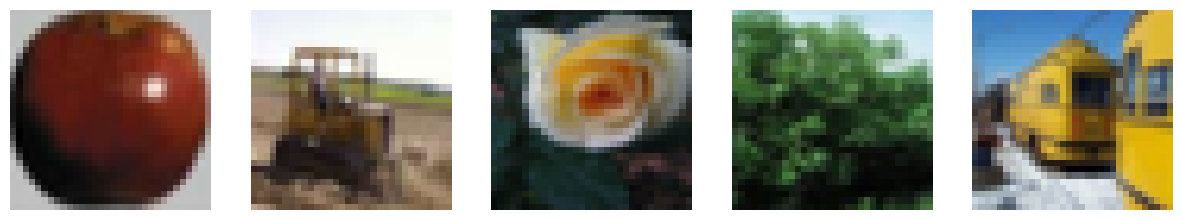

In [ ]:
n = 5
random_indices = np.random.randint(0, X_train.shape[0], n)

plt.figure(figsize=(15, 3))
for i, index in enumerate(random_indices, 1):
    plt.subplot(1, n, i)
    plt.imshow(X_train[index])
    plt.axis('off')

plt.show()

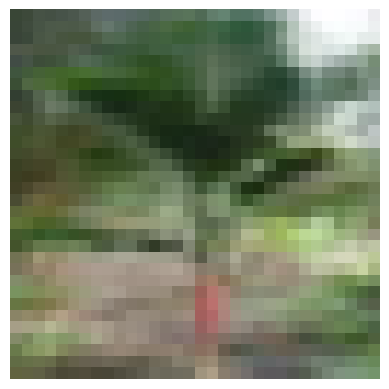

[56]


In [ ]:
idx = 44

plt.imshow(X_train[idx])
plt.axis('off')
plt.show()

print(y_train[idx])

In [ ]:
# Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape,y_val.shape,X_test.shape, y_test.shape)

(40000, 32, 32, 3) (40000, 100) (10000, 32, 32, 3) (10000, 100) (10000, 32, 32, 3) (10000, 100)


In [ ]:
print(y_train[idx])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range = 0.1,
        horizontal_flip = True,
        vertical_flip = False
        )
train_datagen.fit(X_train)

In [ ]:
#Reduce Learning Rate if accuracy is not improving for 3 epochs
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.6,
    min_lr=1e-6)

In [ ]:
resnet_model =  ResNet50(include_top = False,weights = 'imagenet',input_shape = (224,224,3))

for layer in resnet_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model=tf.keras.models.Sequential()
model.add(UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
model.compile(
    optimizer = optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val),callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/100
313/313 [==============================] - 353s 1s/step - loss: 2.6323 - accuracy: 0.3578 - val_loss: 6.5602 - val_accuracy: 0.0088
Epoch 2/100
313/313 [==============================] - 335s 1s/step - loss: 1.4740 - accuracy: 0.5843 - val_loss: 5.9078 - val_accuracy: 0.0428
Epoch 3/100
313/313 [==============================] - 335s 1s/step - loss: 1.2098 - accuracy: 0.6497 - val_loss: 1.7536 - val_accuracy: 0.5187
Epoch 4/100
313/313 [==============================] - 335s 1s/step - loss: 1.0816 - accuracy: 0.6802 - val_loss: 0.9882 - val_accuracy: 0.7103
Epoch 5/100
313/313 [==============================] - 335s 1s/step - loss: 0.9876 - accuracy: 0.7052 - val_loss: 0.8970 - val_accuracy: 0.7380
Epoch 6/100
313/313 [==============================] - 335s 1s/step - loss: 0.9130 - accuracy: 0.7243 - val_loss: 0.8700 - val_accuracy: 0.7437
Epoch 7/100
313/313 [==============================] - 334s 1s/step - loss: 0.8596 - accuracy: 0.7410 - val_loss: 0.8409 - val_accuracy:

In [ ]:
# Evaluate the model
score = model.evaluate(X_val, y_val)

print(score)

313/313 [==============================] - 31s 94ms/step - loss: 0.7581 - accuracy: 0.7751
[0.758127748966217, 0.7750999927520752]


In [ ]:
print(f'Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}')

Test Loss: 0.7581, Test Accuracy: 0.7751


In [ ]:
# Generate predictions
y_pred = model.predict(X_test)

idx = 10

print(y_pred[idx])
print(y_test[idx])

313/313 [==============================] - 28s 87ms/step
[1.1351185e-06 1.9652971e-06 2.4068554e-06 6.6602550e-04 5.8929378e-04
 2.3624378e-04 1.9119836e-06 2.5618829e-07 1.6479165e-05 8.8109755e-06
 3.6713886e-06 1.5866744e-05 1.9975461e-02 2.7936994e-05 7.4466402e-07
 1.2168868e-03 2.6522304e-07 1.7424618e-05 9.3400718e-07 1.5633452e-05
 6.6750617e-05 6.8833790e-04 3.5315852e-06 4.0386976e-03 2.2324606e-07
 1.2703406e-04 1.4468476e-06 1.6068147e-03 6.2072206e-05 1.9391287e-02
 3.6022876e-04 3.2573983e-02 5.4239877e-05 1.5569290e-03 8.1728031e-05
 3.4452986e-04 1.3610340e-07 2.4595598e-04 1.6700161e-04 1.6909467e-05
 6.7529022e-03 5.7466502e-07 2.3560042e-03 3.9647653e-06 2.3550651e-04
 3.3183151e-05 1.7027331e-04 3.2166555e-04 1.1751391e-05 1.1590418e-01
 8.0173334e-07 5.3476497e-06 4.9295928e-04 2.8864960e-07 3.0107094e-05
 3.6996743e-03 1.0623527e-01 8.5413444e-07 1.3201071e-05 1.2507054e-01
 5.4367222e-03 3.9136112e-06 1.9200311e-06 9.8541977e-06 1.3920595e-06
 2.4779799e-04 2.161

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(y_pred_classes[idx])
print(y_true_classes[idx])

71
71


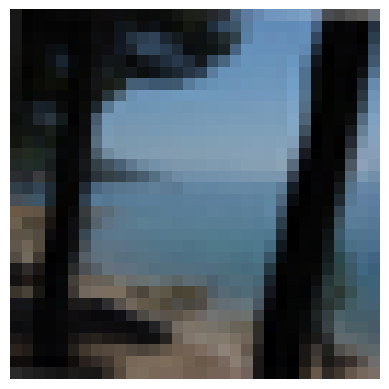

In [ ]:
plt.imshow(X_test[idx])
plt.axis('off')
plt.show()

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

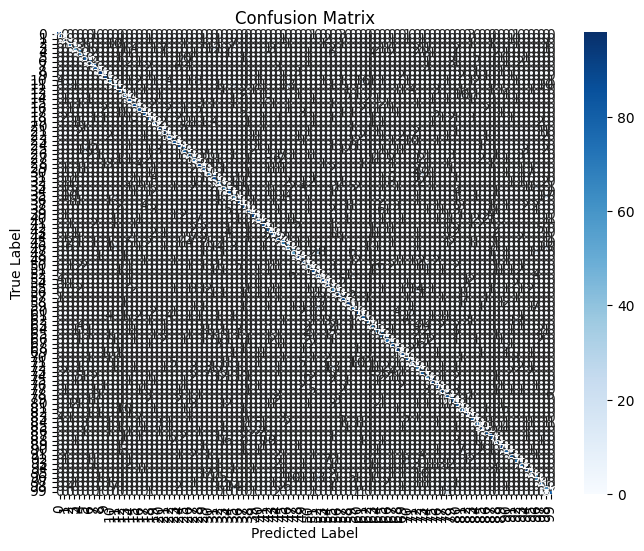

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(100), yticklabels=range(100))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_true=y_true_classes, y_pred=y_pred_classes))#, target_names=class_names.values()))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.85      0.90      0.87       100
           2       0.64      0.68      0.66       100
           3       0.78      0.51      0.62       100
           4       0.69      0.63      0.66       100
           5       0.79      0.81      0.80       100
           6       0.87      0.81      0.84       100
           7       0.79      0.81      0.80       100
           8       0.94      0.95      0.95       100
           9       0.94      0.91      0.92       100
          10       0.76      0.52      0.62       100
          11       0.56      0.54      0.55       100
          12       0.88      0.77      0.82       100
          13       0.80      0.74      0.77       100
          14       0.70      0.85      0.77       100
          15       0.83      0.85      0.84       100
          16       0.82      0.82      0.82       100
          17       0.88    

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

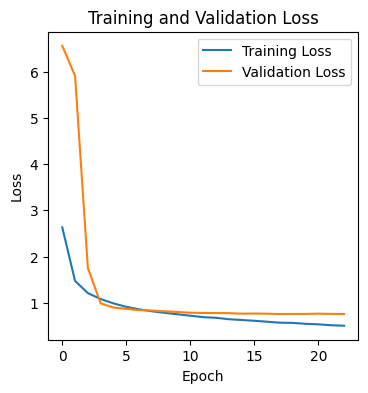

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

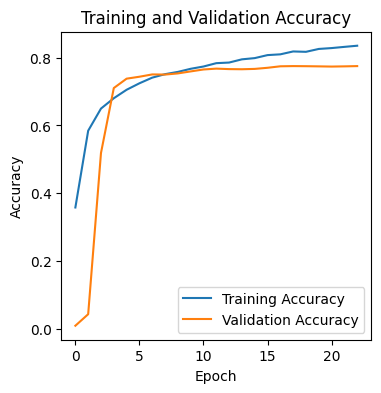

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()